# Pandas Cookbook

## 11장. Matplotlib, Pandas, Seaborn을 이용한 시각화 

https://github.com/PacktPublishing/Pandas-Cookbook/tree/master/data

### 소개

### matplotlib 다뤄 보기

Text(0.5,1.03,'FIgure Title')

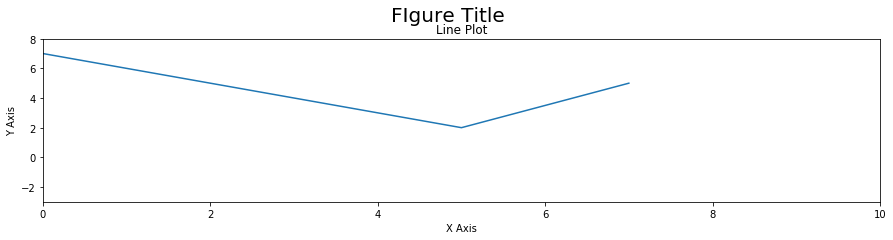

In [4]:
import matplotlib.pyplot as plt

x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15, 3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('FIgure Title', size =20, y =1.03) # subtitle 아님, suptitle

Text(0.5,1.03,'Figure Title')

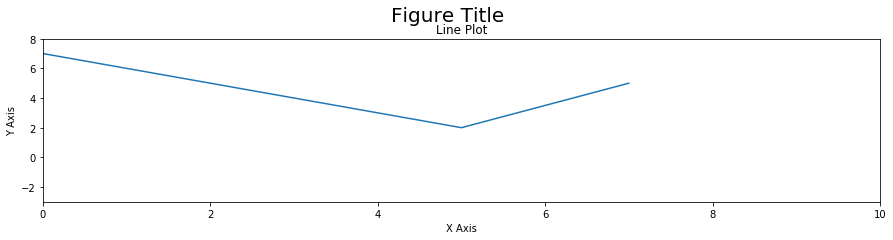

In [6]:
fig, ax = plt.subplots(figsize = (15, 3))
ax.plot(x,y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size = 20, y= 1.03)

In [7]:
import matplotlib.pyplot as plt

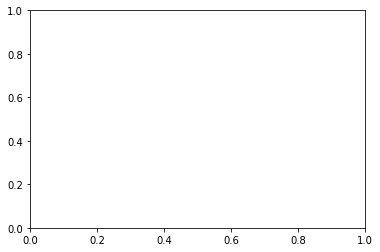

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

In [9]:
type(fig)

matplotlib.figure.Figure

In [10]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [11]:
fig.get_size_inches()

array([6., 4.])

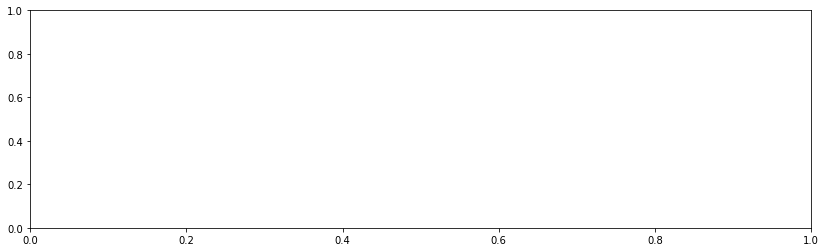

In [13]:
fig.set_size_inches(14, 4)
fig

In [14]:
fig.axes

In [16]:
fig.axes[0] is ax

True

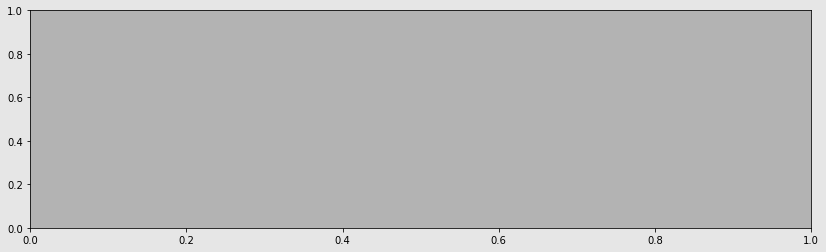

In [20]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [23]:
ax_chidren =ax.get_children()
ax_chidren

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

In [24]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x1205e23c8>),
             ('right', <matplotlib.spines.Spine at 0x1205e2828>),
             ('bottom', <matplotlib.spines.Spine at 0x1205e2400>),
             ('top', <matplotlib.spines.Spine at 0x1205e2978>)])

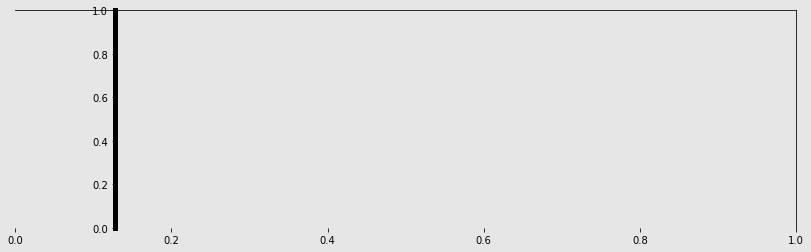

In [28]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


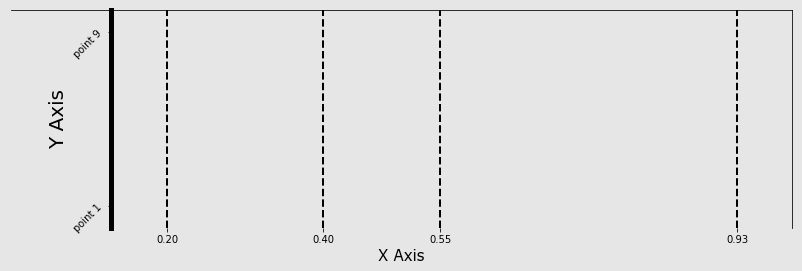

In [32]:
ax.xaxis.grid(True, which = 'major', linewidth = 2, color = 'black', linestyle = '--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family = 'Verdana', fontsize = 15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize = 20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation = 45)
fig

### matplotlib에 대한 객체지향 가이드

### matplotlib를 이용한 데이터 시각화

### Pandas를 이용한 도식화 기초

### 비행 데이터셋 시각화

### 영역 그래프를 스태킹해 새로운 추세 발견

### seaborn과 pandas의 차이점 이해

### seaborn Grid를 사용한 다변량 분석

### seaborn을 사용해 다이어몬드 데이터셋에 있는 심슨의 역설 발견